In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA Function

In [3]:
def visualize_change_heatmap(data, title, years=None):
    """
    Trực quan bằng Heatmap để có cái nhìn tổng quan giữa các quốc gia qua từng năm

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter data for heatmap
    heatmap_data = data.set_index("Country")[years]

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="bwr", 
        linewidths=0.5, 
    )

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [4]:
def visualize_change_panel_bar_plot(data, title, show_value=True, years=None,):
    """
    Trực quan dữ liệu bằng Panel Bar Plot, so sánh sự khác biệt của các quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('Paired', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = data[year]
        value.index = data['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [5]:
def visualize_change_stacked_bar_plot(data,  title, years=None):
    """
    Trực quan dữ liệu bằng Stacked Bar Plot, so sánh sự thay đổi của từng quốc gia qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter the data for the selected countries
    country_list = data['Country']
    filtered_data = data[data['Country'].isin(country_list)]
    
    # Set the country names as the index
    filtered_data.set_index('Country', inplace=True)
    
    # Select only the years to be plotted
    values = filtered_data[years]
    
    # Plot the stacked bar chart
    values.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='Accent')
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.ylabel("Indicator", fontsize=14)
    plt.xlabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.show()

In [6]:
def top_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra top k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = data.sort_values(by=year, ascending=False).head(k)

        print(f"Top {k} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [7]:
def bottom_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra bottom k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        bot_k = data.sort_values(by=year, ascending=True).head(k)

        print(f"Bottom {k} countries for {year}:")
        for _, row in bot_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [12]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất dựa vào giá trị trung bình qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0, số lượng quốc gia thể hiện trên chart
    """
    # Prepare data
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate averages
    data['Average'] = data[years].mean(axis=1)
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Identify extremes
    highest_country = data.nlargest(1, 'Average')
    lowest_country = data.nsmallest(1, 'Average')

    # Combine for visualization
    combined = pd.concat([top_k, bottom_k])

    # Setup plot aesthetics
    plt.figure(figsize=(14, 10), dpi=120)
    ax = plt.gca()

    # Plot each country's data
    for _, row in combined.iterrows():
        if row['Country'] in highest_country['Country'].values:
            color = "#2E86C1"  # Highlight color for highest country
            label = f"{row['Country']} (Highest)"
        elif row['Country'] in lowest_country['Country'].values:
            color = "#E74C3C"  # Highlight color for lowest country
            label = f"{row['Country']} (Lowest)"
        else:
            color = "#95A5A6"  # Neutral color for others
            label = row['Country']

        sns.lineplot(x=years, y=row[years].values, label=label, 
                     linewidth=2, color=color, marker='o', ax=ax)

        # Annotate the last year's point
        ax.text(years[-1], row[years].iloc[-1], f" {row['Country']}", 
                fontsize=10, fontweight='bold', color=color, ha='left', va='center')

    # Title and captions
    ax.set_title(f"Top-{k} and Bottom-{k} Countries with Focus on Extremes", 
                 fontsize=16, weight='bold', loc='left', color="#333333")
    ax.set_xlabel("Year", fontsize=12, color="#333333")
    ax.set_ylabel("Indicator Value", fontsize=12, color="#333333")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust ticks and remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10, color="#333333")
    plt.yticks(fontsize=10, color="#333333")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()


# EDA

In [21]:
fac = pd.read_csv('../data/preprecessed_data/asian_fac.csv')
#fac = fac.drop('Unnamed: 0', axis=1)
fac

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",AFG,Forest area,1000 HA,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000
1,"Afghanistan, Islamic Rep. of",AFG,Index of forest extent,Index,100.000000,100.000000,100.000000,100.000000,100.000000
2,"Afghanistan, Islamic Rep. of",AFG,Land area,1000 HA,65223.000000,65223.000000,65223.000000,65223.000000,65223.000000
3,"Afghanistan, Islamic Rep. of",AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782
4,"Armenia, Rep. of",ARM,Carbon stocks in forests,Million tonnes,15.405200,15.395400,15.385500,NaN,NaN
...,...,...,...,...,...,...,...,...,...
263,Vietnam,VNM,Share of forest area,Percent,46.234682,46.476842,46.719002,46.961162,47.203322
264,West Bank and Gaza,PSE,Forest area,1000 HA,10.140000,10.140000,10.140000,10.140000,10.140000
265,West Bank and Gaza,PSE,Index of forest extent,Index,111.674009,111.674009,111.674009,111.674009,111.674009
266,West Bank and Gaza,PSE,Land area,1000 HA,602.000000,602.000000,602.000000,602.500000,602.500000


In [22]:
fac['Indicator'].value_counts()

Indicator
Forest area                          47
Land area                            47
Share of forest area                 47
Index of forest extent               46
Carbon stocks in forests             41
Index of carbon stocks in forests    40
Name: count, dtype: int64

Bộ dữ liệu Land and Carbon gồm 6 indicator, trong đó nhóm sử dụng 3 chỉ số sau cho việc phân tích thăm dò:
* **Land Area:** Tổng diện tích đất
* **Forest Area:** Tổng diện tích rừng
* **Share of forest area:** Tỉ lệ diện tích rừng trên tổng diện tích đất 

Các chỉ số còn lại trong bộ dữ liệu:
* **Index of forest extent:** Chỉ số diện tích rừng cho thấy quy mô của diện tích rừng trong một năm nhất định, so với năm gốc 1992(100).
* **Carbon stocks in forests :** Trữ lượng cac-bon trong rừng
* **Index of carbon stocks in forests:** Chỉ số cho thấy trữ lượng cac-bon trong sinh khối sống trong rừng của một năm nhất định so với năm cơ sở 1992(100).

## Land Area
Tổng diện tích đất

MAC, HKG, TWN

In [23]:
land_area = fac[fac['Indicator']=='Land area']
land_area

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
2,"Afghanistan, Islamic Rep. of",AFG,Land area,1000 HA,65223.0,65223.000,65223.0000,65223.000,65223.0000
8,"Armenia, Rep. of",ARM,Land area,1000 HA,2847.0,2847.000,2847.0000,2847.000,2847.0000
12,"Azerbaijan, Rep. of",AZE,Land area,1000 HA,8265.4,8265.400,8264.6000,8265.000,8265.0000
16,"Bahrain, Kingdom of",BHR,Land area,1000 HA,77.8,78.000,78.5000,79.000,79.0000
22,Bangladesh,BGD,Land area,1000 HA,13017.0,13017.000,13017.0000,13017.000,13017.0000
28,Bhutan,BTN,Land area,1000 HA,3814.0,3814.000,3814.0000,3814.000,3814.0000
34,Brunei Darussalam,BRN,Land area,1000 HA,527.0,527.000,527.0000,527.000,527.0000
40,Cambodia,KHM,Land area,1000 HA,17652.0,17652.000,17652.0000,17652.000,17652.0000
46,"China, P.R.: Mainland",CHN,Land area,1000 HA,938821.0,938821.000,938821.0000,938821.000,938821.0000
52,Cyprus,CYP,Land area,1000 HA,924.0,924.000,924.0000,924.000,924.0000


In [24]:
land_area.describe()

,2018,2019,2020,2021,2022
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,64968.017021,64968.164830,64968.820857,65000.849936,65004.144613
std,148416.645235,148416.578619,148416.884026,148444.072422,148443.015721
min,30.000000,30.000000,30.000000,30.000000,30.000000
25%,3330.500000,3330.500000,3330.500000,3330.500000,3330.500000
50%,17652.000000,17652.000000,17652.000000,17652.000000,17652.000000
75%,49041.000000,49041.000000,49041.000000,49041.000000,49041.000000
max,938821.000000,938821.000000,938821.000000,938821.000000,938821.000000


In [27]:
land_area.isnull().sum()

Country      0
ISO3         0
Indicator    0
Unit         0
2018         0
2019         0
2020         0
2021         0
2022         0
dtype: int64

Lấy Top3 nước có diện tích đất liền lớn nhất trong khu vực theo các năm

In [30]:
top_k_countries_by_year(land_area, k=3)

Top 3 countries for 2018:
Country: China, P.R.: Mainland, Value: 938821.000
Country: India, Value: 297319.000
Country: Kazakhstan, Rep. of, Value: 269970.000
----------------------------------------
Top 3 countries for 2019:
Country: China, P.R.: Mainland, Value: 938821.000
Country: India, Value: 297319.000
Country: Kazakhstan, Rep. of, Value: 269970.000
----------------------------------------
Top 3 countries for 2020:
Country: China, P.R.: Mainland, Value: 938821.000
Country: India, Value: 297319.000
Country: Kazakhstan, Rep. of, Value: 269970.000
----------------------------------------
Top 3 countries for 2021:
Country: China, P.R.: Mainland, Value: 938821.000
Country: India, Value: 297319.000
Country: Kazakhstan, Rep. of, Value: 269970.000
----------------------------------------
Top 3 countries for 2022:
Country: China, P.R.: Mainland, Value: 938821.000
Country: India, Value: 297319.000
Country: Kazakhstan, Rep. of, Value: 269970.000
----------------------------------------


In [31]:
bottom_k_countries_by_year(land_area, k=3)

Bottom 3 countries for 2018:
Country: Maldives, Value: 30.000
Country: Singapore, Value: 71.400
Country: Bahrain, Kingdom of, Value: 77.800
----------------------------------------
Bottom 3 countries for 2019:
Country: Maldives, Value: 30.000
Country: Singapore, Value: 71.600
Country: Bahrain, Kingdom of, Value: 78.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Maldives, Value: 30.000
Country: Singapore, Value: 71.800
Country: Bahrain, Kingdom of, Value: 78.500
----------------------------------------
Bottom 3 countries for 2021:
Country: Maldives, Value: 30.000
Country: Singapore, Value: 71.800
Country: Bahrain, Kingdom of, Value: 79.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Maldives, Value: 30.000
Country: Singapore, Value: 71.800
Country: Bahrain, Kingdom of, Value: 79.000
----------------------------------------


In [ ]:
def visualize_land_area_bubble_chart(df, years=None):
    """
    Visualize land area using a bubble chart.

    Parameters:
    - data: DataFrame containing the dataset.
    - indicator: The indicator to filter by (e.g., 'Land area').
    - years: List of years to consider for visualization (e.g., ['2018', '2019', '2020', '2021', '2022']).
    """
    # Filter the data for the specific indicator
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate the average value across the specified years
    data['Average'] = data[years].mean(axis=1)

    # Create a bubble chart for each year
    plt.figure(figsize=(14, 8))
    for year in years:
        plt.scatter(
            data['Country'],  # X-axis: Country names
            [year] * len(data),  # Y-axis: Year repeated for each country
            s=data[year] / 10,  # Bubble size proportional to land area
            alpha=0.6,  # Transparency for better visualization
            label=f"{year}"
        )

    # Chart customization
    plt.title(f"Land Area Bubble Chart", fontsize=16)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3)
    plt.legend(title="Years", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

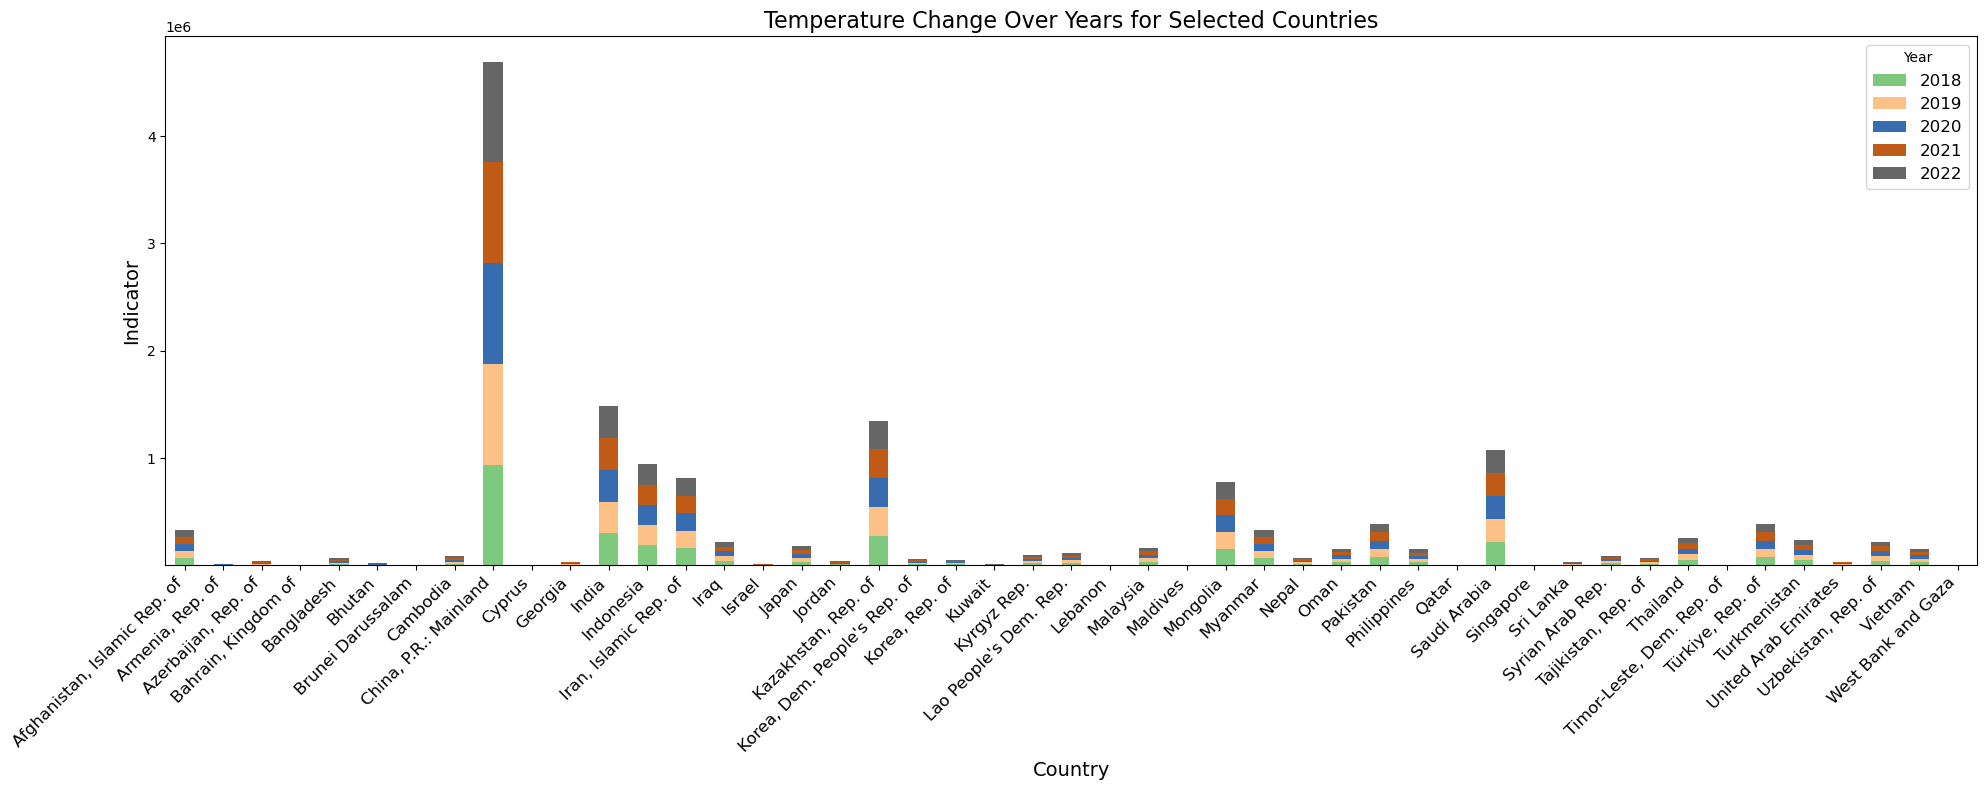

In [32]:
title = "Temperature Change Over Years for Selected Countries"
visualize_change_stacked_bar_plot(land_area, title)

## Forest Area
Tổng diện tích rừng

In [33]:
forest_area = fac[fac['Indicator']=='Forest area']
forest_area

,Country,ISO3,Indicator,Unit,2018,2019,2020,2021,2022
0,"Afghanistan, Islamic Rep. of",AFG,Forest area,1000 HA,1208.4400,1208.44,1208.44,1208.4400,1208.4400
5,"Armenia, Rep. of",ARM,Forest area,1000 HA,328.8900,328.68,328.47,328.2600,328.0500
10,"Azerbaijan, Rep. of",AZE,Forest area,1000 HA,1108.7150,1120.24,1131.77,1143.2967,1154.8256
14,"Bahrain, Kingdom of",BHR,Forest area,1000 HA,0.6600,0.68,0.70,0.7200,0.7400
19,Bangladesh,BGD,Forest area,1000 HA,1883.4000,1883.40,1883.40,1883.4000,1883.4000
25,Bhutan,BTN,Forest area,1000 HA,2721.1200,2723.10,2725.08,2727.0600,2729.0400
31,Brunei Darussalam,BRN,Forest area,1000 HA,380.0000,380.00,380.00,380.0000,380.0000
37,Cambodia,KHM,Forest area,1000 HA,8379.7500,8224.06,8068.37,7912.6800,7756.9900
43,"China, P.R.: Mainland",CHN,Forest area,1000 HA,216219.0400,218098.61,219978.18,221857.7500,223737.3200
49,Cyprus,CYP,Forest area,1000 HA,172.5700,172.55,172.53,172.5100,172.4900


In [34]:
forest_area.describe()

,2018,2019,2020,2021,2022
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13183.215451,13210.179362,13236.974681,13263.882394,13290.715179
std,34974.189123,35189.275675,35405.575863,35623.047976,35841.683751
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,323.095000,322.990000,322.885000,322.780000,322.675000
50%,2119.340000,2116.180000,2113.020000,2109.860000,2106.700000
75%,9553.390000,9483.765000,9410.120000,9339.155000,9266.403350
max,216219.040000,218098.610000,219978.180000,221857.750000,223737.320000


In [36]:
forest_area.isnull().sum()

Country      0
ISO3         0
Indicator    0
Unit         0
2018         0
2019         0
2020         0
2021         0
2022         0
dtype: int64

## Share of forest area
Tỉ lệ diện tích rừng trên tổng diện tích đất

In [12]:
share_forest_area = fac[fac['Indicator']=='Share of forest area']
share_forest_area

,Country,ISO3,Indicator,Unit,F2018,F2019,F2020,F2021,F2022
3,"Afghanistan, Islamic Rep. of",AFG,Share of forest area,Percent,1.852782,1.852782,1.852782,1.852782,1.852782
9,"Armenia, Rep. of",ARM,Share of forest area,Percent,11.552160,11.544784,11.537408,11.530032,11.522655
13,"Azerbaijan, Rep. of",AZE,Share of forest area,Percent,13.413930,13.553367,13.694190,13.832991,13.972482
17,"Bahrain, Kingdom of",BHR,Share of forest area,Percent,0.848329,0.871795,0.891720,0.911392,0.936709
23,Bangladesh,BGD,Share of forest area,Percent,14.468772,14.468772,14.468772,14.468772,14.468772
29,Bhutan,BTN,Share of forest area,Percent,71.345569,71.397483,71.449397,71.501311,71.553225
35,Brunei Darussalam,BRN,Share of forest area,Percent,72.106262,72.106262,72.106262,72.106262,72.106262
41,Cambodia,KHM,Share of forest area,Percent,47.471958,46.589961,45.707965,44.825969,43.943972
47,"China, P.R.: Mainland",CHN,Share of forest area,Percent,23.030912,23.231118,23.431323,23.631528,23.831734
53,Cyprus,CYP,Share of forest area,Percent,18.676407,18.674242,18.672078,18.669913,18.667749


In [13]:
share_forest_area.describe()

,F2018,F2019,F2020,F2021,F2022
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,24.052778,24.019401,23.987068,23.947758,23.916359
std,23.967211,23.911351,23.858869,23.798636,23.748755
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.941116,2.944719,2.948321,2.951924,2.943630
50%,13.893451,13.952102,14.010753,14.069404,14.128055
75%,43.105235,42.883303,42.662376,42.440434,42.218492
max,72.203206,72.106262,72.106262,72.106262,72.106262
